In [1]:

import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.



In [4]:
pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 631.7 kB/s eta 0:00:0031m84.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 300.7 kB/s eta 0:00:001m485.5 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 373.8 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 498.8 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 472.9 kB/s eta 0:00:00MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 1.6 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 4.2 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.9/490.9 kB 1.6 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 918.4/918.4 kB 1.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━

In [2]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 355.8 kB/s eta 0:00:00m eta 0:00:010:00:02
Note: you may need to restart the kernel to use updated packages.




### Below is a helper Function which generates random colors which can be used to give different colors to your plots.Feel free to use it


In [2]:


def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors



## Reading the Data

In [3]:
df = pd.read_csv("/home/dawit/10_Acadamy/Copy of cleaned_fintech_data.csv")
df

Unnamed: 0                      created_at  \
0            0.0  Thu Jun 17 06:26:34 +0000 2021   
1            1.0  Thu Jun 17 06:26:37 +0000 2021   
2            2.0  Thu Jun 17 06:26:42 +0000 2021   
3            3.0  Thu Jun 17 06:26:44 +0000 2021   
4            4.0  Thu Jun 17 06:26:47 +0000 2021   
...          ...                             ...   
5616      2805.0  Thu Jun 17 10:21:02 +0000 2021   
5617      2806.0  Thu Jun 17 10:21:03 +0000 2021   
5618      2807.0  Thu Jun 17 10:21:08 +0000 2021   
5619      2808.0  Thu Jun 17 10:21:09 +0000 2021   
5620      2809.0  Thu Jun 17 10:21:10 +0000 2021   

                                                 source  \
0     <a href="https://mobile.twitter.com" rel="nofo...   
1     <a href="http://twitter.com/download/android" ...   
2     <a href="http://twitter.com/download/android" ...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/android" ...   
...                                                 ...   
5616  <a href="https://mobile.twitter.com" rel="nofo...   
5617  <a href="http://twitter.com/download/android" ...   
5618  <a href="http://twitter.com/download/android" ...   
5619  <a href="http://twitter.com/download/android" ...   
5620  <a href="https://mobile.twitter.com" rel="nofo...   

                                          original_text  \
0     Giving forth life is becoming a burden in Keny...   
1     Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...   
2     Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...   
3     Today is World Day to Combat #Desertification ...   
4     Hearing #GregHunt say he's confident vaccines ...   
...                                                 ...   
5616  Lambie has voted AGAINST Medivac, Carbon tax, ...   
5617  Idhi me bathuku \nMost Day1 Records In Nizam f...   
5618  welkin moon giveaway bc i finally have money!\...   
5619  Manam edi chesina \n\nDaaniki kuda elevation i...   
5620  This is the first time I've seen the Governmen...   

                                             clean_text  \
0     Giving forth life becoming burden Kenya This m...   
1     Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...   
2     Rei chintu lo Vachina Ad Nizam ne lo kottaru f...   
3     Today World Day Combat Restoring degraded land...   
4     Hearing say 's confident vaccines delivered li...   
...                                                 ...   
5616  Lambie voted AGAINST Medivac Carbon tax protec...   
5617  Idhi bathuku Most Day1 Records In Nizam Non BB...   
5618  welkin moon giveaway bc finally money -u got t...   
5619  Manam edi chesina Daaniki kuda elevation istad...   
5620  This first time I 've seen Government media le...   

                                              sentiment             polarity  \
0     Sentiment(polarity=0.3194444444444445, subject...   0.3194444444444445   
1             Sentiment(polarity=0.0, subjectivity=0.0)                  0.0   
2             Sentiment(polarity=0.0, subjectivity=0.0)                  0.0   
3           Sentiment(polarity=0.25, subjectivity=0.65)                 0.25   
4     Sentiment(polarity=0.5, subjectivity=0.8333333...                  0.5   
...                                                 ...                  ...   
5616  Sentiment(polarity=0.13636363636363635, subjec...  0.13636363636363635   
5617          Sentiment(polarity=0.5, subjectivity=0.5)                  0.5   
5618  Sentiment(polarity=0.15416666666666667, subjec...  0.15416666666666667   
5619          Sentiment(polarity=0.0, subjectivity=0.0)                  0.0   
5620  Sentiment(polarity=0.13, subjectivity=0.406666...                 0.13   

             subjectivity lang favorite_count  ... original_author  \
0      0.5305555555555556   en              0  ...        reen_law   
1                     0.0   in              0  ...      Amigo9999_   
2                     0.0   hi              0  ...     MallaSuhaas   
3            

In [4]:
print(df.shape)

(5621, 21)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5620 non-null   float64
 1   created_at              5621 non-null   object 
 2   source                  5621 non-null   object 
 3   original_text           5621 non-null   object 
 4   clean_text              5617 non-null   object 
 5   sentiment               5621 non-null   object 
 6   polarity                5621 non-null   object 
 7   subjectivity            5621 non-null   object 
 8   lang                    5621 non-null   object 
 9   favorite_count          5621 non-null   object 
 10  retweet_count           5621 non-null   object 
 11  original_author         5621 non-null   object 
 12  screen_count            5621 non-null   object 
 13  followers_count         5621 non-null   object 
 14  friends_count           5621 non-null   

## filling misisng value using mode since non-numeric 

In [6]:
df['hashtags'].fillna(df['hashtags'].mode()[0], inplace=True)
df['place'].fillna(df['place'].mode()[0], inplace=True)
df['place_coord_boundaries'].fillna(df['place_coord_boundaries'].mode()[0], inplace=True)
df['clean_text'].fillna(df['clean_text'].mode()[0], inplace=True)
df['possibly_sensitive'].fillna(df['possibly_sensitive'].mode()[0], inplace=True)

In [7]:
# Assuming 'column_name_to_remove' is the name of the unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

# EDA

In [8]:
df.head()

created_at  \
0  Thu Jun 17 06:26:34 +0000 2021   
1  Thu Jun 17 06:26:37 +0000 2021   
2  Thu Jun 17 06:26:42 +0000 2021   
3  Thu Jun 17 06:26:44 +0000 2021   
4  Thu Jun 17 06:26:47 +0000 2021   

                                              source  \
0  <a href="https://mobile.twitter.com" rel="nofo...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/android" ...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/android" ...   

                                       original_text  \
0  Giving forth life is becoming a burden in Keny...   
1  Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...   
2  Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...   
3  Today is World Day to Combat #Desertification ...   
4  Hearing #GregHunt say he's confident vaccines ...   

                                          clean_text  \
0  Giving forth life becoming burden Kenya This m...   
1  Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...   
2  Rei chintu lo Vachina Ad Nizam ne lo kottaru f...   
3  Today World Day Combat Restoring degraded land...   
4  Hearing say 's confident vaccines delivered li...   

                                           sentiment            polarity  \
0  Sentiment(polarity=0.3194444444444445, subject...  0.3194444444444445   
1          Sentiment(polarity=0.0, subjectivity=0.0)                 0.0   
2          Sentiment(polarity=0.0, subjectivity=0.0)                 0.0   
3        Sentiment(polarity=0.25, subjectivity=0.65)                0.25   
4  Sentiment(polarity=0.5, subjectivity=0.8333333...                 0.5   

         subjectivity lang favorite_count retweet_count original_author  \
0  0.5305555555555556   en              0             0        reen_law   
1                 0.0   in              0             0      Amigo9999_   
2                 0.0   hi              0             0     MallaSuhaas   
3                0.65   en              0             0     CIACOceania   
4  0.8333333333333334   en              0             0   MccarronWendy   

  screen_count followers_count friends_count possibly_sensitive  \
0          398              70           223              False   
1        19047             132          1084              False   
2        47341            2696          2525              False   
3         7039             343           387              False   
4        26064             419           878              False   

                               hashtags  user_mentions  place  \
0                               Prabhas  janetmachuka_  place   
1                               Prabhas    maheshblood  place   
2                               Prabhas    Hail_Kalyan  place   
3  Desertification, Drought, resilience    EdwardVrkic  place   
4                    GregHunt, Morrison  WriteWithDave  place   

    place_coord_boundaries                  timestamp  
0         Hyderabad, India  2021-06-17 06:26:34+00:00  
1                    India  2021-06-17 06:26:37+00:00  
2                    Vizag  2021-06-17 06:26:42+00:00  
3         Papua New Guinea  2021-06-17 06:26:44+00:00  
4  Sydney, New South Wales  2021-06-17 06:26:47+00:00

In [9]:
df.describe()

created_at  \
count                             5621   
unique                            2811   
top     Thu Jun 17 06:26:34 +0000 2021   
freq                                 2   

                                                   source  \
count                                                5621   
unique                                                 43   
top     <a href="http://twitter.com/download/android" ...   
freq                                                 3322   

                                            original_text  \
count                                                5621   
unique                                                855   
top     "I ask again - who pays?"\n\nAndrew Neil chall...   
freq                                                  182   

                                               clean_text  \
count                                                5621   
unique                                                801   
top     `` I ask pays `` Andrew Neil challenges Rishi ...   
freq                                                  186   

                                        sentiment polarity subjectivity  lang  \
count                                        5621     5621         5621  5621   
unique                                        455      246          256    19   
top     Sentiment(polarity=0.0, subjectivity=0.0)      0.0          0.0    en   
freq                                         1780     2134         1846  3408   

       favorite_count retweet_count original_author screen_count  \
count            5621          5621            5621         5621   
unique              2             2            2340         2712   
top                 0             0   SustainTrends          331   
freq             5620          5620              46           10   

       followers_count friends_count possibly_sensitive hashtags  \
count             5621          5621               5621     5621   
unique            1482          1478                  3      171   
top               5928           159              False  Prabhas   
freq                36            48               5618     5010   

       user_mentions  place place_coord_boundaries                  timestamp  
count           5621   5621                   5621                       5621  
unique           749      1                   1112                       2811  
top           TWTM__  place       Hyderabad, India  2021-06-17 06:26:34+00:00  
freq             234   5621                   2128                          2

In [10]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()



In [11]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df.head()

created_at  \
0  Thu Jun 17 06:26:34 +0000 2021   
1  Thu Jun 17 06:26:37 +0000 2021   
2  Thu Jun 17 06:26:42 +0000 2021   
3  Thu Jun 17 06:26:44 +0000 2021   
4  Thu Jun 17 06:26:47 +0000 2021   

                                              source  \
0  <a href="https://mobile.twitter.com" rel="nofo...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/android" ...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/android" ...   

                                       original_text  \
0  Giving forth life is becoming a burden in Keny...   
1  Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...   
2  Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...   
3  Today is World Day to Combat #Desertification ...   
4  Hearing #GregHunt say he's confident vaccines ...   

                                          clean_text  \
0  Giving forth life becoming burden Kenya This m...   
1  Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...   
2  Rei chintu lo Vachina Ad Nizam ne lo kottaru f...   
3  Today World Day Combat Restoring degraded land...   
4  Hearing say 's confident vaccines delivered li...   

                                           sentiment            polarity  \
0  Sentiment(polarity=0.3194444444444445, subject...  0.3194444444444445   
1          Sentiment(polarity=0.0, subjectivity=0.0)                 0.0   
2          Sentiment(polarity=0.0, subjectivity=0.0)                 0.0   
3        Sentiment(polarity=0.25, subjectivity=0.65)                0.25   
4  Sentiment(polarity=0.5, subjectivity=0.8333333...                 0.5   

         subjectivity lang favorite_count retweet_count original_author  \
0  0.5305555555555556   en              0             0        reen_law   
1                 0.0   in              0             0      Amigo9999_   
2                 0.0   hi              0             0     MallaSuhaas   
3                0.65   en              0             0     CIACOceania   
4  0.8333333333333334   en              0             0   MccarronWendy   

  screen_count followers_count friends_count possibly_sensitive  \
0          398              70           223              False   
1        19047             132          1084              False   
2        47341            2696          2525              False   
3         7039             343           387              False   
4        26064             419           878              False   

                               hashtags  user_mentions  place  \
0                               Prabhas  janetmachuka_  place   
1                               Prabhas    maheshblood  place   
2                               Prabhas    Hail_Kalyan  place   
3  Desertification, Drought, resilience    EdwardVrkic  place   
4                    GregHunt, Morrison  WriteWithDave  place   

    place_coord_boundaries                  timestamp  
0         Hyderabad, India  2021-06-17 06:26:34+00:00  
1                    India  2021-06-17 06:26:37+00:00  
2                    Vizag  2021-06-17 06:26:42+00:00  
3         Papua New Guinea  2021-06-17 06:26:44+00:00  
4  Sydney, New South Wales  2021-06-17 06:26:47+00:00

In [15]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


!pip install jupyterthemes
!pip install seaborn
!pip install missingno
!pip install vaderSentiment



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 1.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 496.8 kB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 496.2 kB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 621.6 kB/s eta 0:00:00MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 403.5 kB/s eta 0:00:000:00:01m eta 0:00:01


In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors
plt.style.use('ggplot')

import seaborn as sns
import missingno as msno

# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

import re
import string
import json
import glob

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download ('wordnet')

import spacy
!python -m spacy download en_core_web_md

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Downloading package stopwords to /home/dawit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dawit/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [18]:

df.columns

Index(['created_at', 'source', 'original_text', 'clean_text', 'sentiment',
       'polarity', 'subjectivity', 'lang', 'favorite_count', 'retweet_count',
       'original_author', 'screen_count', 'followers_count', 'friends_count',
       'possibly_sensitive', 'hashtags', 'user_mentions', 'place',
       'place_coord_boundaries', 'timestamp'],
      dtype='object')

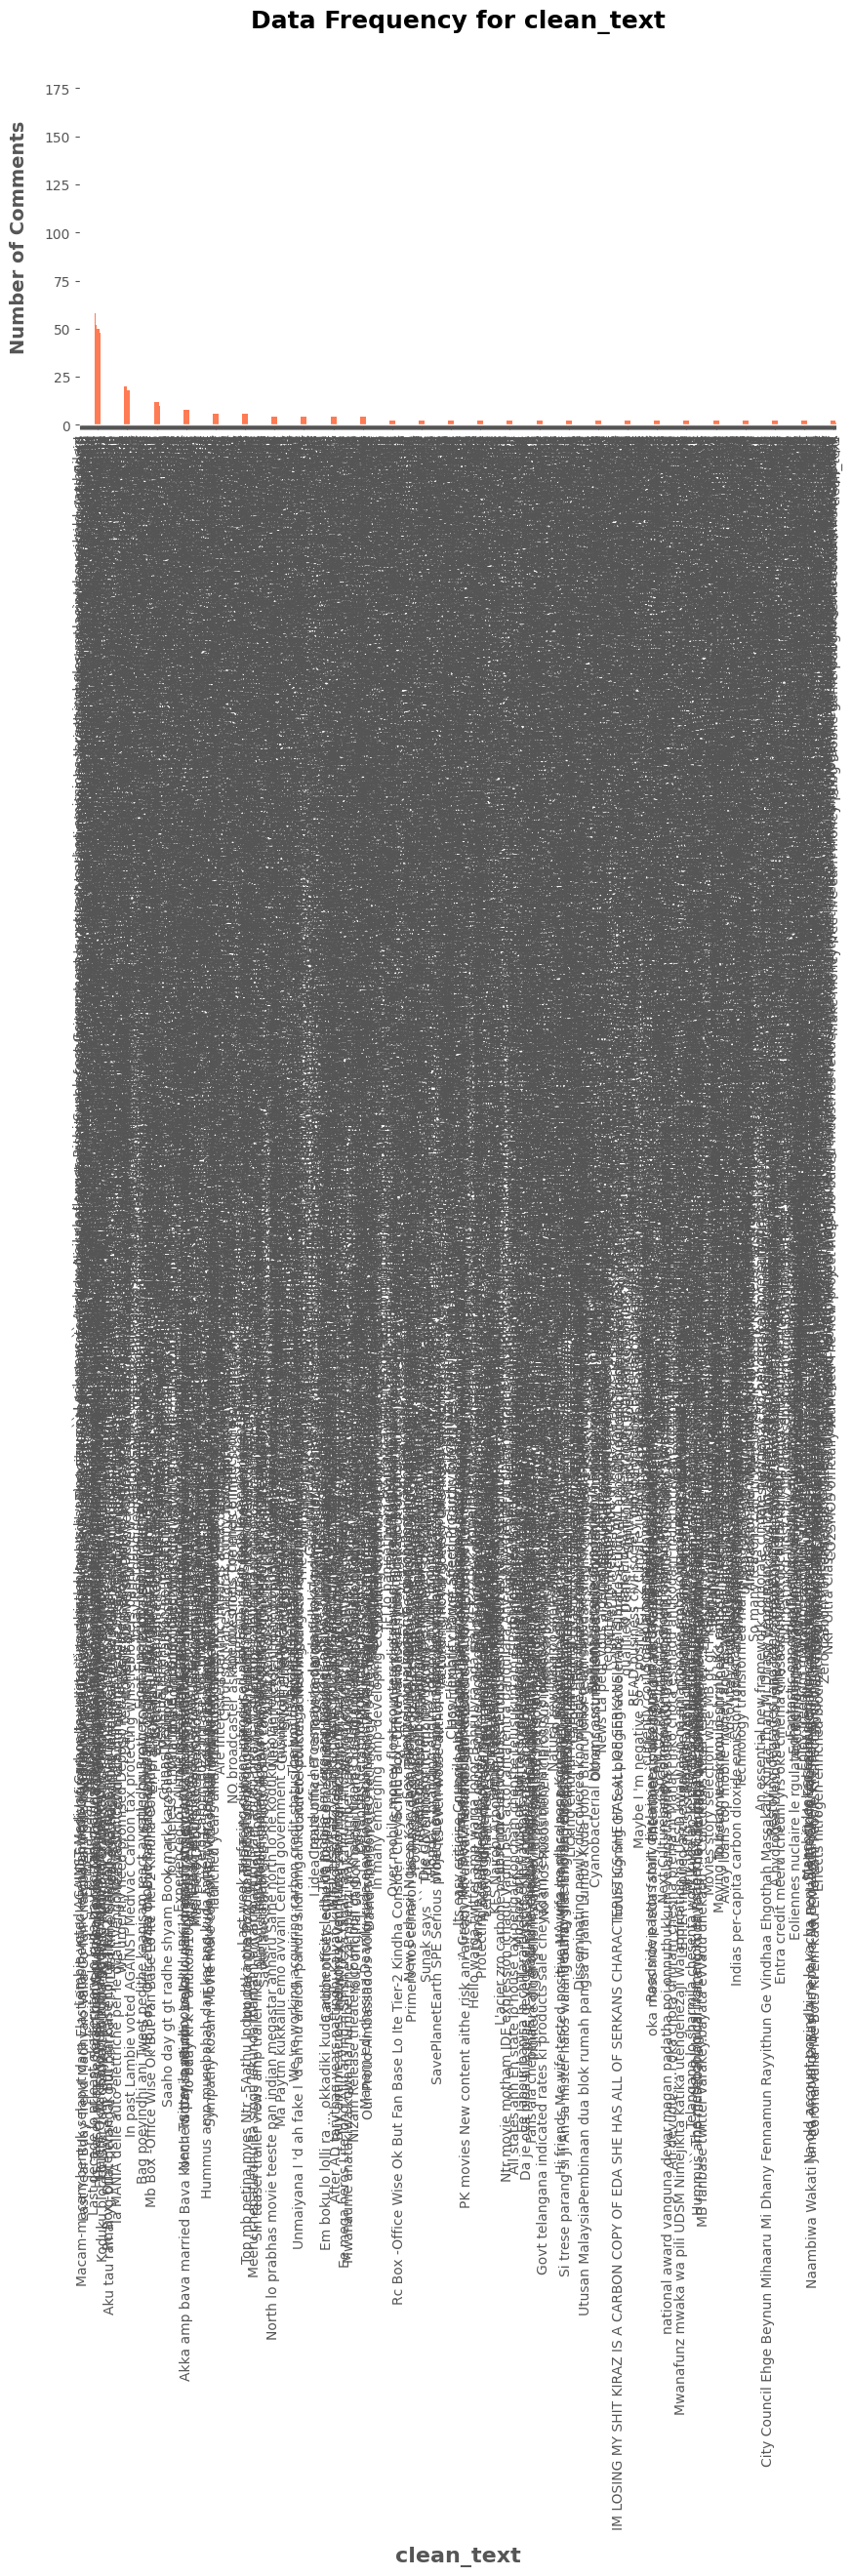

In [21]:

df['clean_text'].value_counts().sort_values(ascending = False).plot(kind='bar', figsize=(10,5), width=0.2, color="#FF7B54")

plt.xlabel("clean_text", fontsize=16, fontweight="semibold", labelpad=12)
plt.ylabel("Number of Comments", fontsize=14, fontweight="semibold", labelpad=12)
plt.title("Data Frequency for clean_text", fontsize=18,pad=16, fontweight="bold")

plt.show()

In [22]:


# Generating TF-IDF Vector for KMeans from the comment_body
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                ngram_range = (1,3),
                                stop_words = "english"
                                
                            )

vectors = vectorizer.fit_transform(df.clean_text)



In [23]:


# Text Comment CLeaning
# defining some characters, stopwords that need to be removed

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
TAG_RE = re.compile(r'<[^>]+>')


# this function will just check wheather the argument is a number or not
def isDigit(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

# A funtion to clean the text comments
def clean_text(sentence, stem=False):
    
    sentence = str(sentence)
    #Remove integers
    sentence = "".join([i for i in sentence if isDigit(i)==False])
    
    # Make all the text lower
    sentence = sentence.lower()

    # Remove html tags
    sentence = TAG_RE.sub('', sentence)

    # Remove speacial characters 
    sentence = re.sub(text_cleaning_re, ' ',sentence)
    
    # Remove Punctuations
    sentence = sentence.translate(str.maketrans("", "", string.punctuation))

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.
    
    # Remove stopwords and Stemming
    items = []
    for item in sentence.split():
        if item not in stop_words:
            if stem:
                items.append(stemmer.stem(item))
            else:
                items.append(item)
    
    sentence = " ".join(items)
    
    return sentence



# Replacing the text comment with cleaned one by passing them one by one to the clean text function
df.clean_text = df.clean_text.apply(lambda x: clean_text(x))
df.head()



created_at  \
0  Thu Jun 17 06:26:34 +0000 2021   
1  Thu Jun 17 06:26:37 +0000 2021   
2  Thu Jun 17 06:26:42 +0000 2021   
3  Thu Jun 17 06:26:44 +0000 2021   
4  Thu Jun 17 06:26:47 +0000 2021   

                                              source  \
0  <a href="https://mobile.twitter.com" rel="nofo...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/android" ...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/android" ...   

                                       original_text  \
0  Giving forth life is becoming a burden in Keny...   
1  Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...   
2  Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...   
3  Today is World Day to Combat #Desertification ...   
4  Hearing #GregHunt say he's confident vaccines ...   

                                          clean_text  \
0  giving forth life becoming burden kenya mother...   
1  teenmaar crpanja crgabbarsingh cr khaleja kuda...   
2  rei chintu lo vachina ad nizam ne lo kottaru f...   
3  today world day combat restoring degraded land...   
4  hearing say confident vaccines delivered like ...   

                                           sentiment            polarity  \
0  Sentiment(polarity=0.3194444444444445, subject...  0.3194444444444445   
1          Sentiment(polarity=0.0, subjectivity=0.0)                 0.0   
2          Sentiment(polarity=0.0, subjectivity=0.0)                 0.0   
3        Sentiment(polarity=0.25, subjectivity=0.65)                0.25   
4  Sentiment(polarity=0.5, subjectivity=0.8333333...                 0.5   

         subjectivity lang favorite_count retweet_count original_author  \
0  0.5305555555555556   en              0             0        reen_law   
1                 0.0   in              0             0      Amigo9999_   
2                 0.0   hi              0             0     MallaSuhaas   
3                0.65   en              0             0     CIACOceania   
4  0.8333333333333334   en              0             0   MccarronWendy   

  screen_count followers_count friends_count possibly_sensitive  \
0          398              70           223              False   
1        19047             132          1084              False   
2        47341            2696          2525              False   
3         7039             343           387              False   
4        26064             419           878              False   

                               hashtags  user_mentions  place  \
0                               Prabhas  janetmachuka_  place   
1                               Prabhas    maheshblood  place   
2                               Prabhas    Hail_Kalyan  place   
3  Desertification, Drought, resilience    EdwardVrkic  place   
4                    GregHunt, Morrison  WriteWithDave  place   

    place_coord_boundaries                  timestamp  
0         Hyderabad, India  2021-06-17 06:26:34+00:00  
1                    India  2021-06-17 06:26:37+00:00  
2                    Vizag  2021-06-17 06:26:42+00:00  
3         Papua New Guinea  2021-06-17 06:26:44+00:00  
4  Sydney, New South Wales  2021-06-17 06:26:47+00:00

## Kmeans Clustering


TF-IDF Vector for Kmeans


In [24]:
# Generating TF-IDF Vector for KMeans from the comment_body
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                ngram_range = (1,3),
                                stop_words = "english"
                                
                            )

vectors = vectorizer.fit_transform(df.clean_text)


Finding Optimal number of clusters


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc0aca0ce00>
Traceback (most recent call last):
  File "/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^

['default_value']


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc0aca0ce00>
Traceback (most recent call last):
  File "/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^

Text(0.5, 1.0, 'Elbow plot')

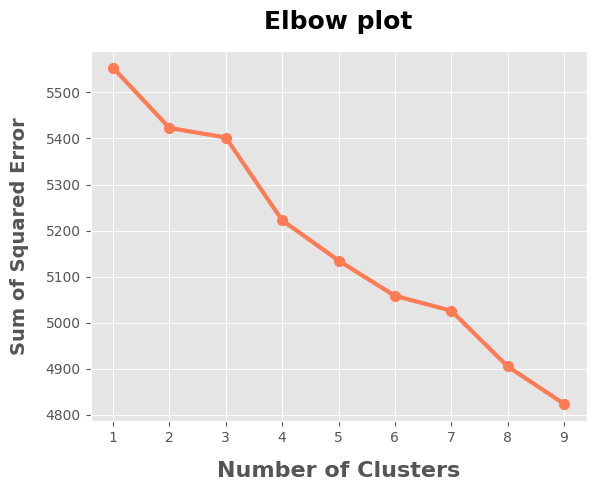

In [30]:
my_string = None
my_string = my_string or "default_value"
parts = my_string.split(',')
print(parts)

k_range = range(1,10)
sse = []

for k in k_range:
    model = KMeans(n_clusters= k, init="k-means++", random_state=38, max_iter=100, n_init=1) #43, 45
    model.fit(vectors)
    sse.append(model.inertia_)

## Ploting SSE vs Number of Clusters and found the optimum number of clusters
    

plt.plot(k_range, sse, color="#FF7B54", marker = '.', markersize=14, linewidth = 3)
plt.xlabel("Number of Clusters", fontsize=16, fontweight="semibold", labelpad=12)
plt.ylabel("Sum of Squared Error", fontsize=14, fontweight="semibold", labelpad=12)
plt.title("Elbow plot", fontsize=18,pad=16, fontweight="bold")


#### Optimal Clusters

In [29]:
# Labeling the rows of the dataframe with cluster labels
true_k = 4
model = KMeans(n_clusters=true_k, init="k-means++", random_state=48, max_iter=2000, n_init=1)
y_predicted = model.fit_predict(vectors)
df["cluster"] = y_predicted
df['cluster'].value_counts()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc09761a3e0>
Traceback (most recent call last):
  File "/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^

cluster
3    4713
1     532
2     270
0     106
Name: count, dtype: int64

In [31]:
## Printing the Hotwords of every clusters

print("Cluster Hotwords")
hotwords = model.cluster_centers_.argsort()[:, ::-1]
feature_names = vectorizer.get_feature_names()

for i in range(true_k):
    print(f"Cluster {i}")
    for j in hotwords[i, :20]:
        print(f"{feature_names[j]}")
    print("-------------------------")

Cluster Hotwords


AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'


## Word Cloud for the Clusters
Cluster 0


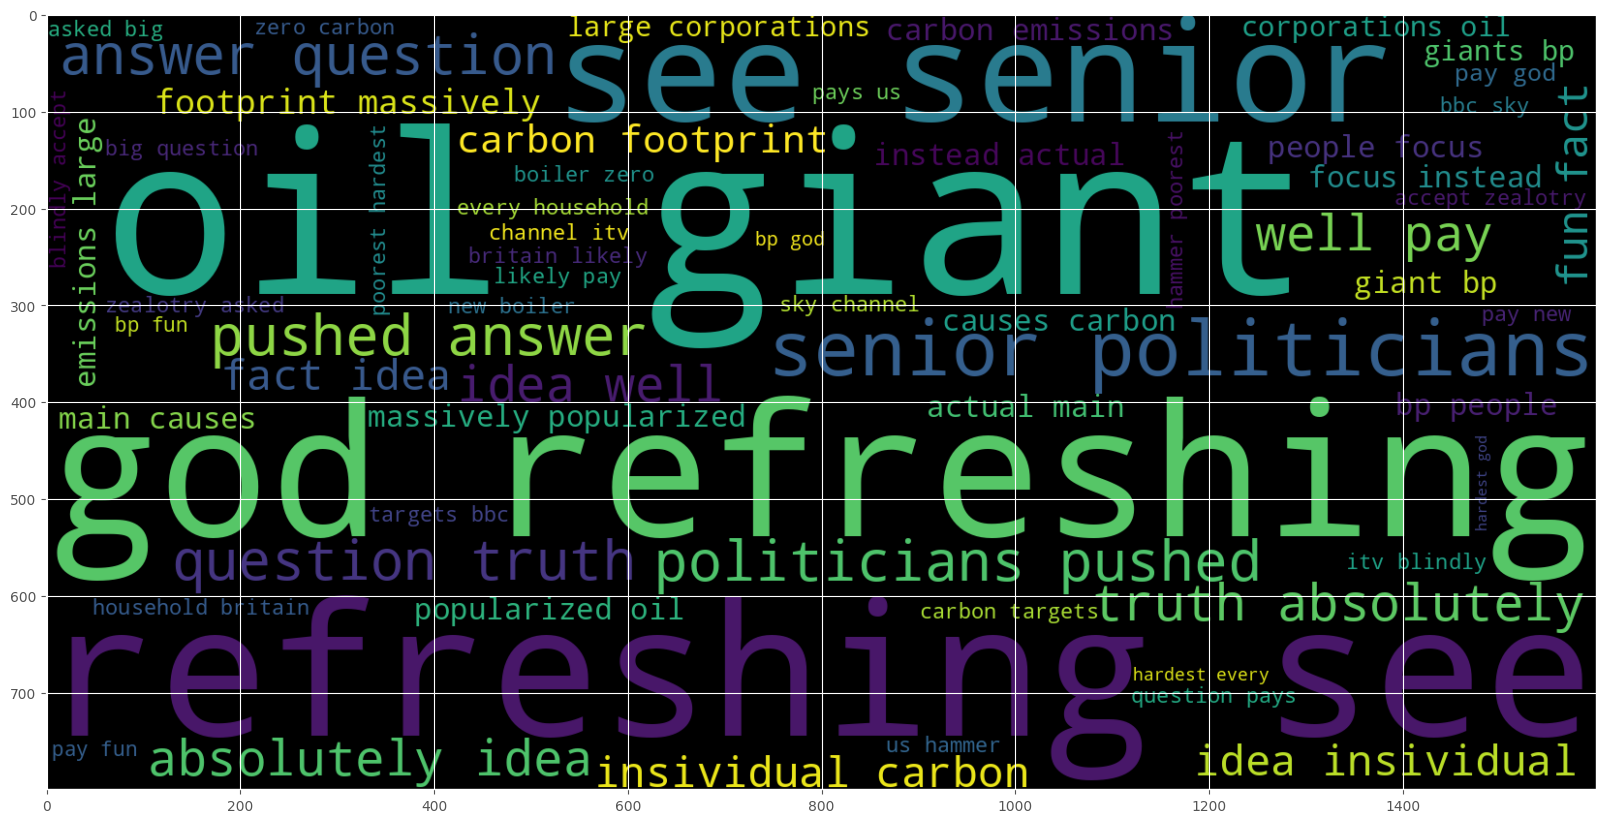

In [32]:


plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.cluster == 0 ].clean_text))
plt.imshow(wc , interpolation = 'bilinear')




## Cluster 1


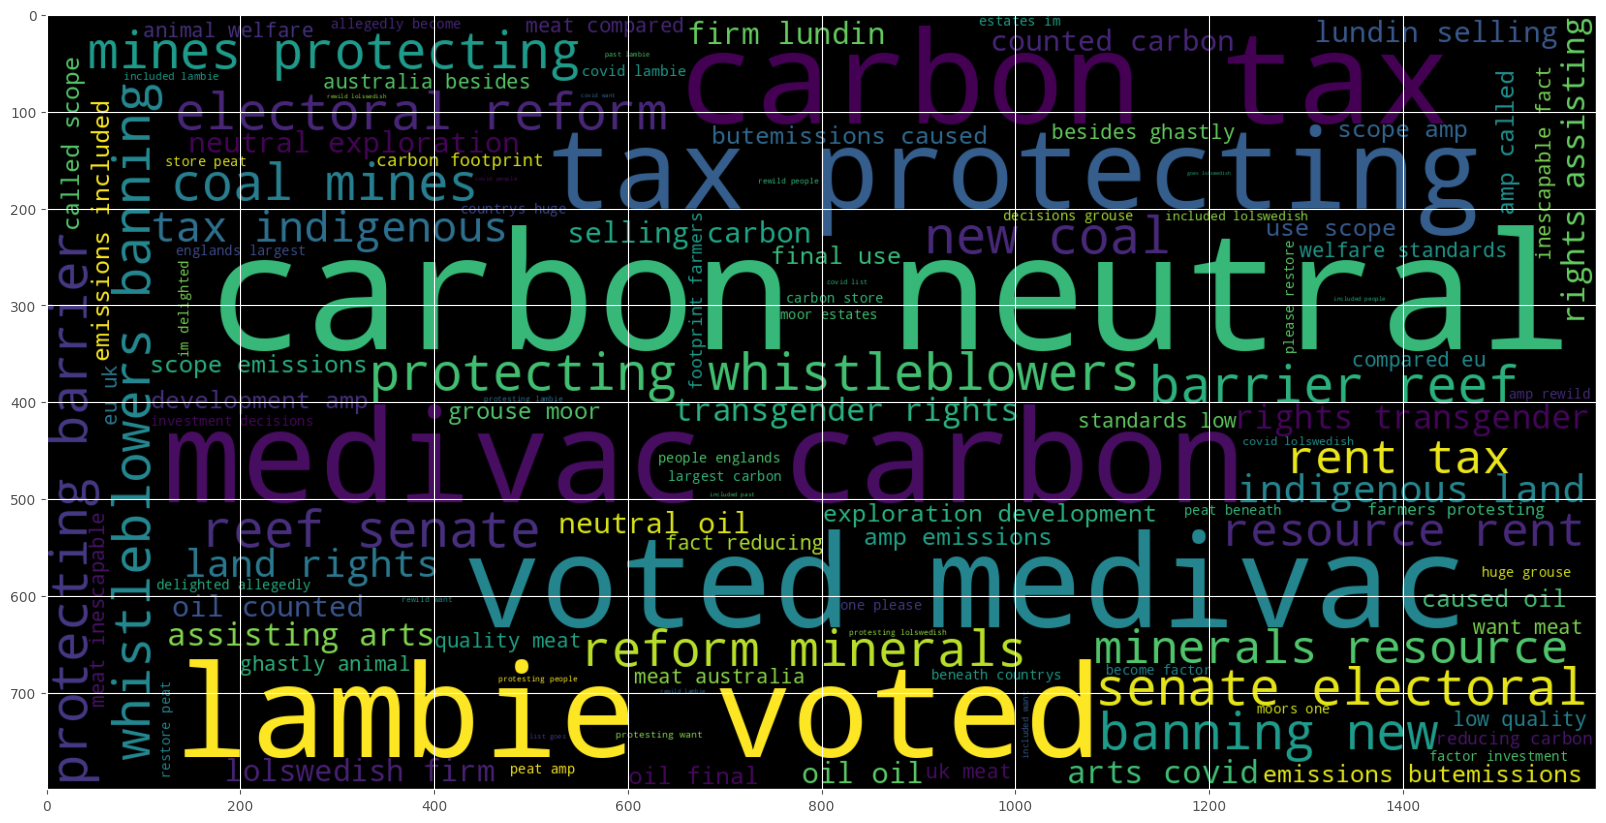

In [33]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.cluster == 1 ].clean_text))
plt.imshow(wc , interpolation = 'bilinear')



## Cluster 2


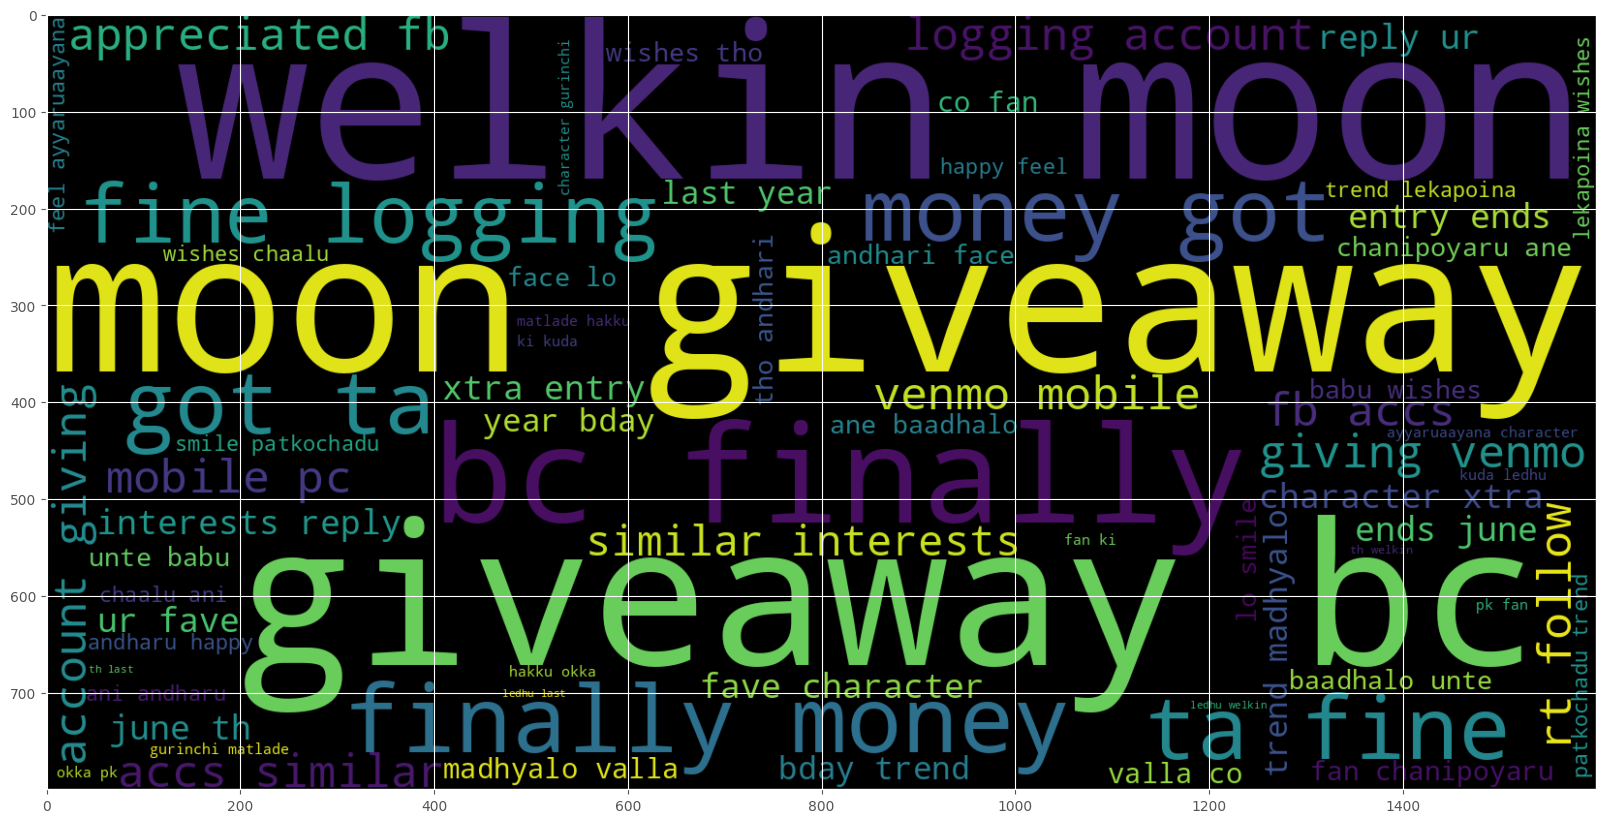

In [34]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.cluster == 2 ].clean_text))
plt.imshow(wc , interpolation = 'bilinear')

## Cluster 3

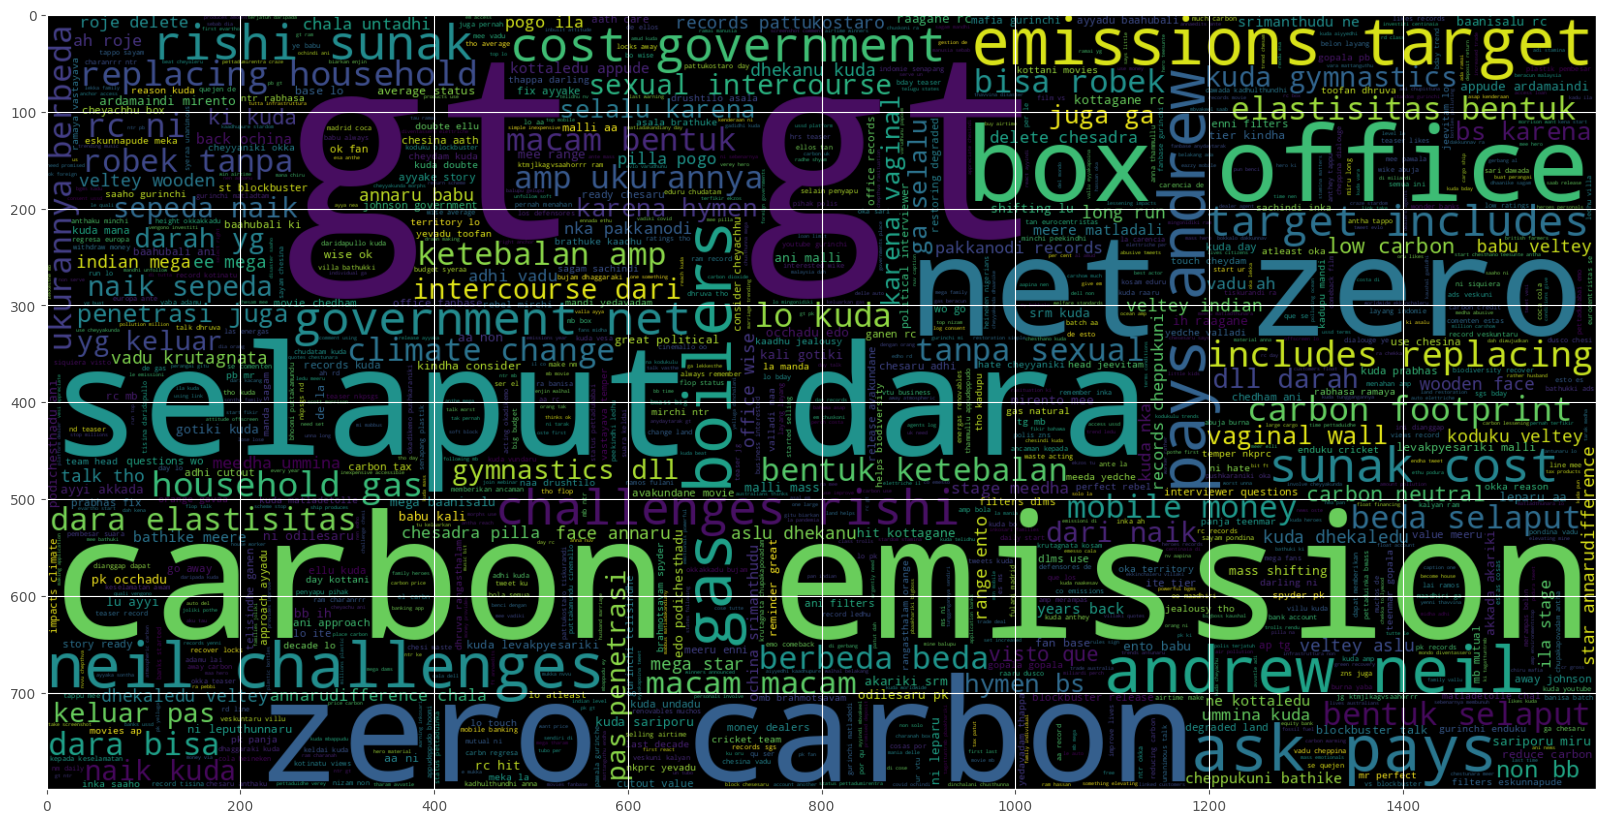

In [35]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.cluster == 3 ].clean_text))
plt.imshow(wc , interpolation = 'bilinear')


### Frequency distribution accoring to the clusters.


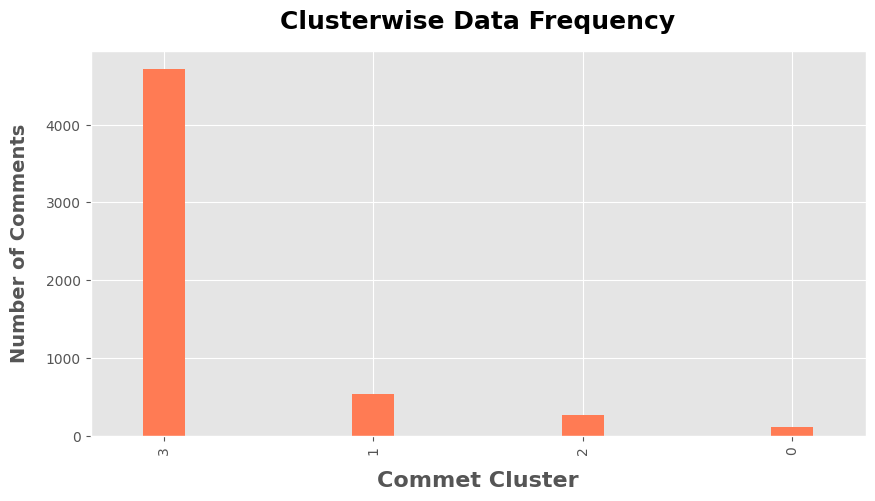

In [36]:

df['cluster'].value_counts().sort_values(ascending = False).plot(kind='bar', figsize=(10,5), width=0.2, color="#FF7B54")

plt.xlabel("Commet Cluster", fontsize=16, fontweight="semibold", labelpad=12)
plt.ylabel("Number of Comments", fontsize=14, fontweight="semibold", labelpad=12)
plt.title("Clusterwise Data Frequency", fontsize=18,pad=16, fontweight="bold" )

plt.show()




# Topic Modeling using LDA (Latent Dirichlet Allocation)



#### Removing frequent and rare words


In [37]:
# Creating list of Frequent words from comment text
freq = pd.Series(' '.join(df['clean_text']).split()).value_counts()[:15]

# Removing Frequent words from comment text
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [41]:
# all_word_series
all_word_series = pd.Series(' '.join(df['clean_text']).split()).value_counts()[-20000:]

# Creating list of words which has appeared less then 4 times in the entire corpus
rare = []
for i in range(0,20000,1):
    if all_word_series.values[i] <=4:
        rare.append(all_word_series.index[i])
        
# Removing Rare words from comment text
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))

IndexError: index 6956 is out of bounds for axis 0 with size 6956


Lemmatization


In [42]:
# Creating nlp object
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

In [43]:
# User defined function to perform lemmatization of the comment text
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ','VERB', 'ADV']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output


In [45]:
# lemmatization of the comment text
text_list=df['clean_text'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

teenmaar crpanja crgabbarsingh cr khaleja varaku undhi dookudu crbusinessman cr urike ginjukuntaru endhuku ra mari appudu em ayyindhi kottadaniki
['dookudu', 'appudu']


## Bigrams and Trigrams

In [46]:
# Creating bigrams and tigrams for LDA 

bigram_phrases = gensim.models.Phrases(tokenized_reviews, min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[tokenized_reviews], threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(tokenized_reviews)
data_bigrams_trigrams = make_trigrams(data_bigrams)

In [47]:
# Removing frequent words from bigrams and tigrams and generating TF-IDF model
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

#### Finding Optimum topic num

In [48]:
# Function to calculate Coherence Value for Various Model taken from stackoverflow

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state= 1)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [49]:
## Generating LDA model and calculating Coherence score for them.

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=tokenized_reviews, start=1, limit=10, step=1)

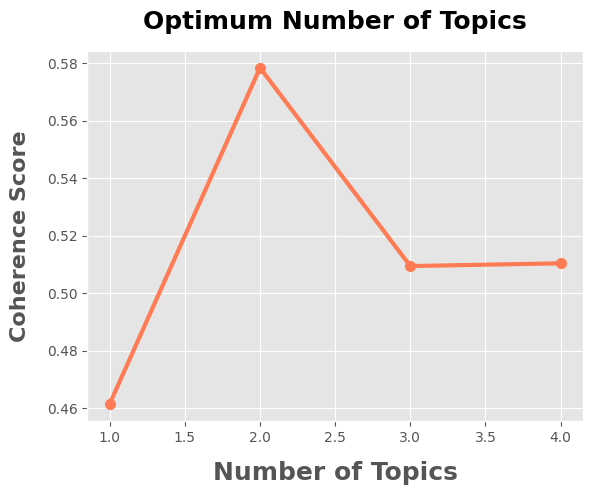

In [50]:
# Plotting the Coherence socre for different number of topics to find out the optimum number of topics

limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values, color="#FF7B54", marker = '.', markersize=14, linewidth = 3)
plt.title("Optimum Number of Topics", fontsize=18, fontweight="bold", pad=16)
plt.xlabel("Number of Topics", fontsize=18, fontweight="semibold", labelpad=12)
plt.ylabel("Coherence Score", fontsize=16, fontweight="semibold", labelpad=12)
plt.show()

In [51]:
# Printing the coherence scores

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.4615
Num Topics = 2  has Coherence Value of 0.5784
Num Topics = 3  has Coherence Value of 0.5094
Num Topics = 4  has Coherence Value of 0.5104
Num Topics = 5  has Coherence Value of nan
Num Topics = 6  has Coherence Value of nan
Num Topics = 7  has Coherence Value of nan
Num Topics = 8  has Coherence Value of nan
Num Topics = 9  has Coherence Value of nan


## Optimum Model for LDA

In [52]:
# Select the model and print the topics
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.036*"right" + 0.034*"protect" + 0.024*"land" + 0.020*"new" + 0.018*"ban" + 0.018*"covid" + 0.017*"coal" + 0.017*"art" + 0.017*"resource" + 0.017*"vote"'),
 (1,
  '0.037*"neutral" + 0.034*"include" + 0.033*"scope" + 0.024*"use" + 0.022*"net" + 0.021*"sell" + 0.021*"challenge" + 0.020*"government" + 0.018*"target" + 0.018*"gas"'),
 (2,
  '0.022*"footprint" + 0.019*"wish" + 0.018*"meat" + 0.018*"low" + 0.017*"face" + 0.015*"fact" + 0.014*"co" + 0.013*"reduce" + 0.012*"farmer" + 0.012*"standard"'),
 (3,
  '0.018*"use" + 0.013*"go" + 0.012*"answer" + 0.011*"pay" + 0.011*"great" + 0.011*"peat" + 0.011*"government" + 0.010*"grouse" + 0.010*"idea" + 0.010*"away"'),
 (4,
  '0.028*"record" + 0.021*"account" + 0.020*"get" + 0.018*"mobile" + 0.017*"give" + 0.015*"finally" + 0.015*"follow" + 0.015*"hit" + 0.015*"similar" + 0.014*"appreciate"')]

In [53]:
# Visualizing the topics with gensim heatmap

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.279567 -0.109971       1        1  23.168283
2      0.018575  0.081164       2        1  20.875639
1      0.196611 -0.189500       3        1  19.298905
4      0.022462  0.213052       4        1  18.596878
3      0.041920  0.005255       5        1  18.060295, topic_info=        Term        Freq       Total Category  logprob  loglift
694  protect  430.000000  430.000000  Default  30.0000  30.0000
697    right  471.000000  471.000000  Default  29.0000  29.0000
122    scope  351.000000  351.000000  Default  28.0000  28.0000
120  include  370.000000  370.000000  Default  27.0000  27.0000
121  neutral  453.000000  453.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
575      big   57.355080   87.464975   Topic5  -5.1413   1.2895
471   people   65.834790  151.013682   Topic5  -5.0034   0.8812
314    first   57.387540  109.435182   Topic5  -5.1407   1.0659
132      get   64.025245  285.885917   Topic5  -5.0313   0.2151
44   airtime   57.607476  204.795230   Topic5  -5.1369   0.4431

[291 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
810       2  0.023198                     aa
810       4  0.974309                     aa
580       1  0.004265                account
580       2  0.059707                account
580       4  0.904130                account
...     ...       ...                    ...
179       2  0.378817                   year
179       3  0.396036                   year
179       4  0.091834                   year
179       5  0.077485                   year
3179      2  0.961283  year_come_consumption

[716 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 5, 4])

In [54]:
# Obtaining the main topic for each review:

lda_corpus = optimal_model[corpus]

all_topics = optimal_model.get_document_topics(corpus)
all_topics
num_docs = len(all_topics)
num_docs
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_csr
all_topics_numpy= all_topics_csr.T.toarray()
all_topics_numpy
major_topic= [np.argmax(arr) for arr in all_topics_numpy]
df['major_topic']= major_topic
df.head()

created_at  \
0  Thu Jun 17 06:26:34 +0000 2021   
1  Thu Jun 17 06:26:37 +0000 2021   
2  Thu Jun 17 06:26:42 +0000 2021   
3  Thu Jun 17 06:26:44 +0000 2021   
4  Thu Jun 17 06:26:47 +0000 2021   

                                              source  \
0  <a href="https://mobile.twitter.com" rel="nofo...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/android" ...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/android" ...   

                                       original_text  \
0  Giving forth life is becoming a burden in Keny...   
1  Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...   
2  Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...   
3  Today is World Day to Combat #Desertification ...   
4  Hearing #GregHunt say he's confident vaccines ...   

                                          clean_text  \
0  giving forth life becoming burden kenya mother...   
1  teenmaar crpanja crgabbarsingh cr khaleja vara...   
2  rei chintu vachina ad nizam ne kottaru films p...   
3  today world day combat restoring degraded land...   
4  hearing say confident vaccines delivered like ...   

                                           sentiment            polarity  \
0  Sentiment(polarity=0.3194444444444445, subject...  0.3194444444444445   
1          Sentiment(polarity=0.0, subjectivity=0.0)                 0.0   
2          Sentiment(polarity=0.0, subjectivity=0.0)                 0.0   
3        Sentiment(polarity=0.25, subjectivity=0.65)                0.25   
4  Sentiment(polarity=0.5, subjectivity=0.8333333...                 0.5   

         subjectivity lang favorite_count retweet_count  ... followers_count  \
0  0.5305555555555556   en              0             0  ...              70   
1                 0.0   in              0             0  ...             132   
2                 0.0   hi              0             0  ...            2696   
3                0.65   en              0             0  ...             343   
4  0.8333333333333334   en              0             0  ...             419   

  friends_count possibly_sensitive                              hashtags  \
0           223              False                               Prabhas   
1          1084              False                               Prabhas   
2          2525              False                               Prabhas   
3           387              False  Desertification, Drought, resilience   
4           878              False                    GregHunt, Morrison   

   user_mentions  place   place_coord_boundaries                  timestamp  \
0  janetmachuka_  place         Hyderabad, India  2021-06-17 06:26:34+00:00   
1    maheshblood  place                    India  2021-06-17 06:26:37+00:00   
2    Hail_Kalyan  place                    Vizag  2021-06-17 06:26:42+00:00   
3    EdwardVrkic  place         Papua New Guinea  2021-06-17 06:26:44+00:00   
4  WriteWithDave  place  Sydney, New South Wales  2021-06-17 06:26:47+00:00   

  cluster major_topic  
0       3           3  
1       3           4  
2       3           0  
3       3           0  
4       3           4  

[5 rows x 22 columns]

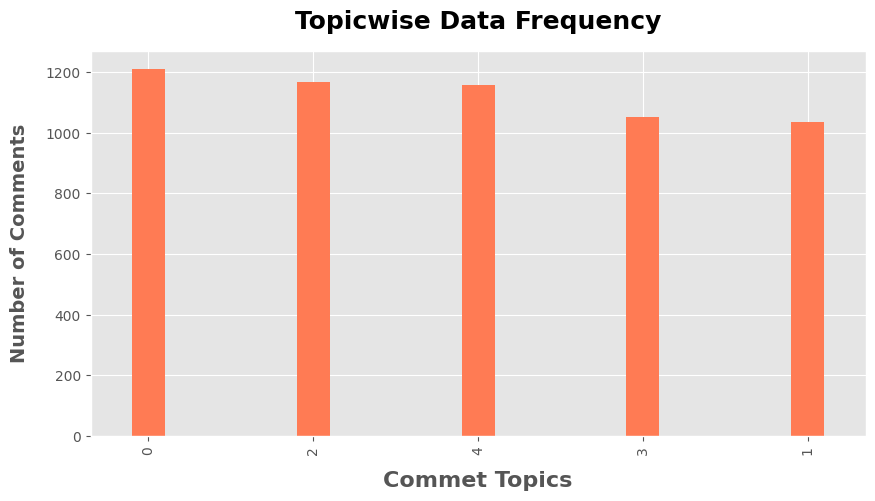

In [55]:
# Plotting Data frequency for topics

df['major_topic'].value_counts().sort_values(ascending = False).plot(kind='bar',figsize=(10,5), width=0.2, color="#FF7B54")

plt.xlabel("Commet Topics", fontsize=16, fontweight="semibold", labelpad=12)
plt.ylabel("Number of Comments", fontsize=14, fontweight="semibold", labelpad=12)
plt.title("Topicwise Data Frequency", fontsize=18,pad=16, fontweight="bold" )

plt.show()

## Pivot table and data visualization according to Clusters and Topics

In [56]:


import plotly.express as px
import plotly.figure_factory as ff



In [58]:

piv = pd.pivot_table(df, index= "cluster", columns = "major_topic", values = "polarity", aggfunc ="count")
piv


major_topic       0      1      2      3       4
cluster                                         
0               NaN    NaN   36.0   70.0     NaN
1             190.0  162.0  108.0   72.0     NaN
2               NaN    NaN  126.0    NaN   144.0
3            1020.0  873.0  898.0  909.0  1013.0

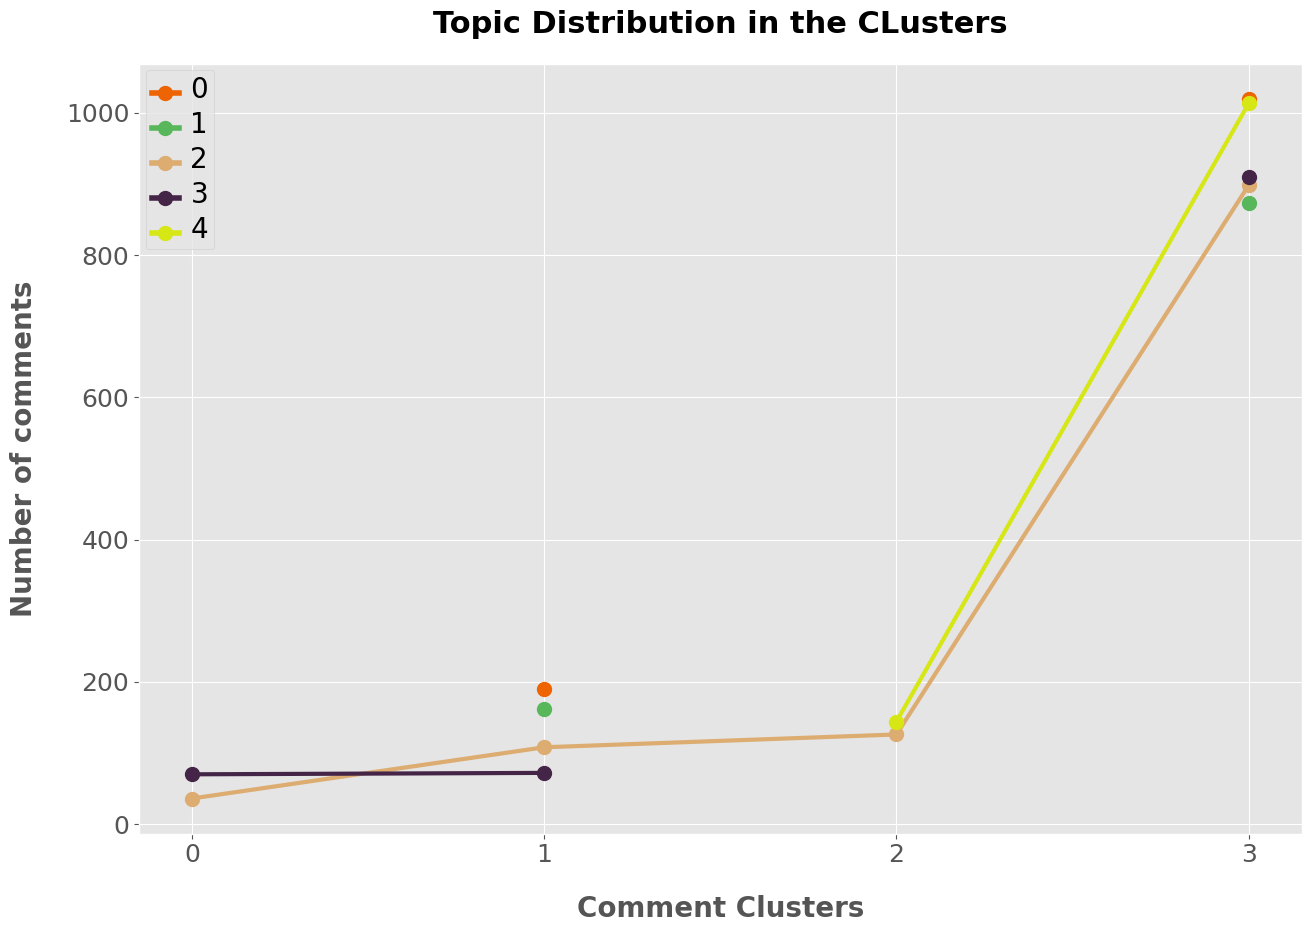

In [59]:
color_map1 = matplotlib.colors.ListedColormap(["#EE6302", "#57B75A", "#BD323F", "#DDAC71", "#452547", "#D6E715"])
ax = piv.plot(xticks=piv.index, ylabel="Number of comments", figsize=(15,10), fontsize=18, colormap=color_map1, marker = '.', markersize=20, linewidth = 3)

ax.set_title("Topic Distribution in the CLusters", fontsize=22, pad=22, fontweight="bold")
ax.set_xlabel("Comment Clusters", fontsize=20, fontweight="semibold", labelpad=20)
ax.set_ylabel("Number of comments", fontsize=20, fontweight="semibold", labelpad=20)

leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(4)
for text in leg.get_texts():
    text.set_fontsize(20)

plt.show()


##  Sentiment Analysis


###### VADER(Valence Aware Dictionary for sEntiment Reasoning) sentiment analysis

In [60]:
## Creating Vader object for Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

analyser = SentimentIntensityAnalyzer()

In [71]:
# Calculating Polarity and adding the scores inside the existing dataframe
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['clean_text']
    id = row['index']
    result[id] = analyser.polarity_scores(text)
    
# Convert result dictionary into dataframe
df_sentiment = pd.DataFrame(result).T

# Merge result with the input dataframe
df_sentiment = df_sentiment.reset_index().rename(columns={'index':''})
df_sentiment = df.merge(df_sentiment, how='left')
df_sentiment.head()


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [67]:
!pip install --upgrade jupyter ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 420.8 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 274.9 kB/s eta 0:00:000:00:01 eta 0:00:01


In [68]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/jupyterlab/debuglog.py:56: UserWarning: An error occurred.
  warnings.warn("An error occurred.")
/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/jupyterlab/debuglog.py:57: UserWarning: ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
  warnings.warn(msg[-1].strip())
/home/dawit/anaconda3/envs/acadamy_10/lib/python3.11/site-packages/jupyterlab/debuglog.py:58: UserWarning: See the log file for details: /tmp/jupyterlab-de

In [64]:
pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 319.9 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.9/214.9 kB 741.5 kB/s eta 0:00:00MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:010m
  Attempting uninstall: comm
    Found existing installation: comm 0.1.2
    Uninstalling comm-0.1.2:
      Successfully uninstalled comm-0.1.2
Note: you may need to restart the kernel to use updated packages.


In [72]:
# Function to label the sentiment according to score
def get_tag(val):
    if val <= -0.50:
        return 'Negative'
    elif val > -0.5 and val < 0:
        return 'Somewhat Negative'
    elif val < 0.5 and val > 0:
        return 'Somewhat Positive'
    elif val >= 0.5:
        return 'Positive'
    else:
        return 'Neutral'